In [2]:
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Load pheno file
data = pd.read_csv('pheno/motor_RL_pheno_scrub_raw.csv')
data_clean = data.dropna() # remove nan's
data_clean.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Handedness,BMI,Gender,Endurance_Unadj,...,GaitSpeed_Comp,Dexterity_Unadj,Dexterity_AgeAdj,Strength_Unadj,Strength_AgeAdj,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,FD,FD_scrubbed
0,HCP100206,27,NotTwin,NotTwin,56037,85858.0,65,26.64,M,123.31,...,1.24,106.61,94.23,132.46,129.43,108.79,49.7,72.63,0.090883,0.090883
1,HCP100307,27,Twin,NotMZ,51488,81352.0,95,22.96,F,114.05,...,1.58,118.68,105.21,108.34,84.59,101.12,38.6,71.69,0.108998,0.108998
2,HCP100408,33,Twin,MZ,51730,81594.0,55,27.75,M,121.00,...,1.51,117.48,106.24,125.18,124.24,108.79,52.6,114.01,0.098323,0.098323
3,HCP100610,27,Twin,NotMZ,52813,82634.0,85,36.91,M,107.24,...,1.10,121.55,107.85,123.16,118.90,122.25,38.6,84.84,0.139763,0.137298
4,HCP101006,35,Twin,MZ,51283,81149.0,90,30.27,F,81.58,...,1.24,106.53,96.00,116.06,106.93,122.25,38.6,123.80,0.165364,0.138544


In [4]:
data_clean.describe()

,Age_in_Yrs,Mother_ID,Father_ID,Handedness,BMI,Endurance_Unadj,Endurance_AgeAdj,GaitSpeed_Comp,Dexterity_Unadj,Dexterity_AgeAdj,Strength_Unadj,Strength_AgeAdj,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,FD,FD_scrubbed
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,28.812652,52770.681265,82618.709246,65.596107,26.527676,109.834684,107.451204,1.329951,112.949939,100.616375,116.082019,102.700462,111.184939,45.572141,94.950292,0.141008,0.128847
std,3.645889,1628.607339,1611.027140,44.939503,5.259997,11.933425,13.934537,0.196226,10.791153,9.827093,11.090354,19.959377,8.949401,7.461752,14.204060,0.045360,0.033611
min,22.000000,50371.000000,80310.000000,-100.000000,16.480000,80.780000,69.960000,0.790000,86.720000,73.420000,55.290000,45.410000,82.740000,38.600000,56.350000,0.066063,0.066063
25%,26.000000,51538.750000,81402.000000,60.000000,22.750000,101.902500,98.145000,1.182500,105.800000,93.990000,107.680000,85.500000,101.120000,38.600000,84.070000,0.107344,0.102852
50%,29.000000,52164.000000,82027.000000,80.000000,25.485000,108.690000,106.710000,1.320000,112.490000,101.005000,114.560000,98.975000,108.790000,44.100000,95.360000,0.131666,0.124304
75%,32.000000,52956.750000,82778.750000,90.000000,29.257500,117.097500,116.265000,1.450000,120.480000,107.850000,123.760000,121.327500,122.250000,52.200000,104.660000,0.163888,0.148990
max,37.000000,56202.000000,86021.000000,100.000000,47.760000,145.170000,145.560000,2.000000,148.670000,139.730000,152.210000,154.590000,122.250000,71.600000,134.650000,0.372604,0.273592


In [5]:
data_subset = data_clean.get(['Age_in_Yrs', 'Handedness','BMI','Endurance_Unadj',
                        'GaitSpeed_Comp','Dexterity_Unadj','Strength_Unadj',
                        'Odor_Unadj' ,'PainInterf_Tscore','Taste_Unadj','FD'])

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


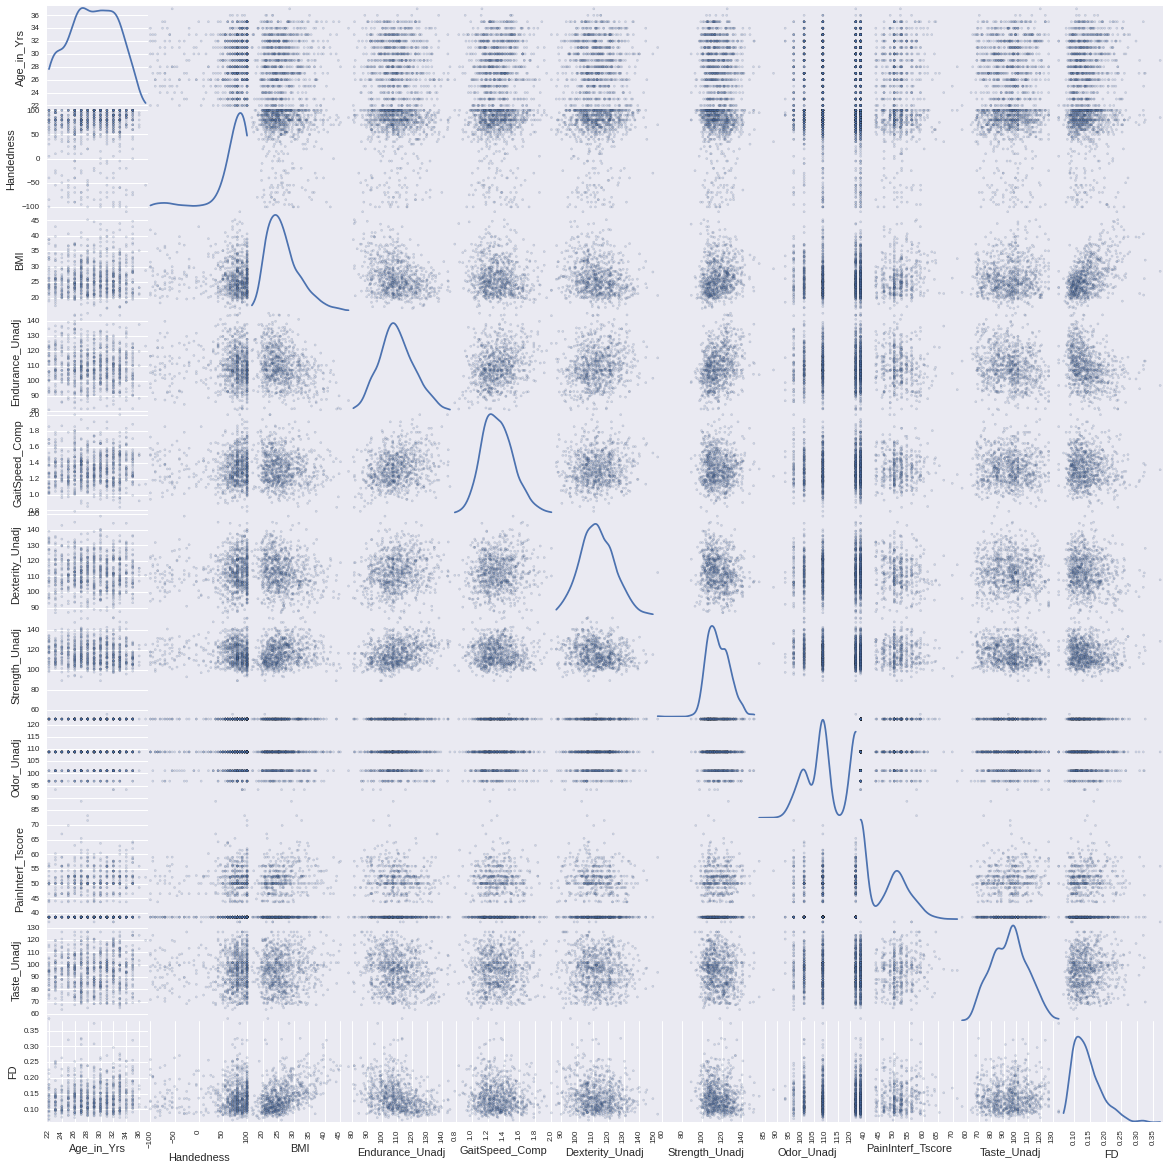

In [15]:
plot_dist = scatter_matrix(data_subset, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [7]:
# Compute the correlation matrix
corr = data_subset.corr()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


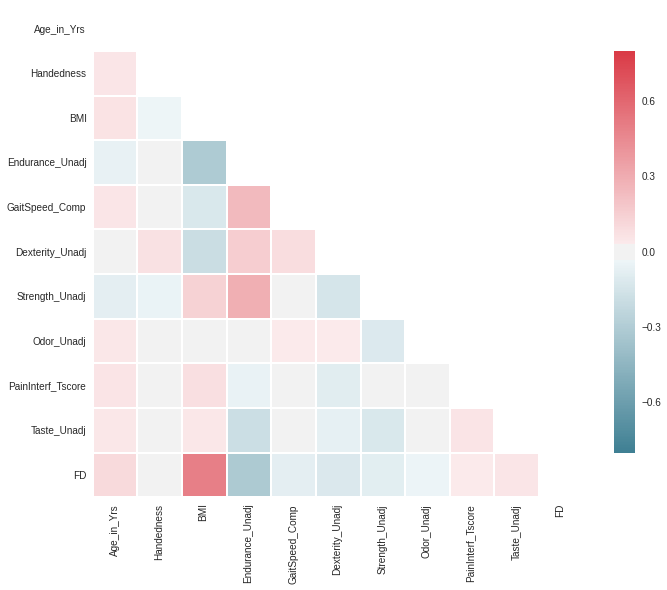

In [8]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.8,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

#### The most correlated pheno

A high correlation between FD, Endurance and BMI

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


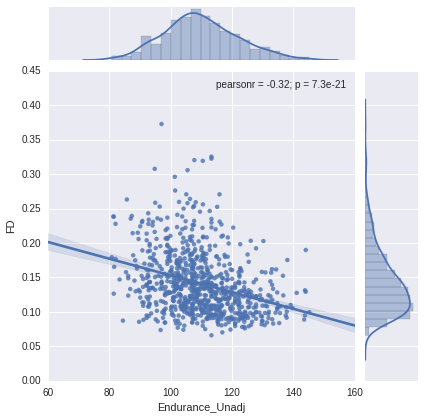

In [45]:
sns.set(color_codes=True)
sns.jointplot(x="Endurance_Unadj", y="FD", data=data_subset,kind='reg');

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


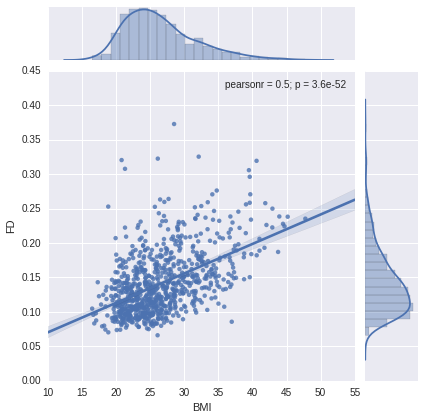

In [13]:
sns.jointplot(x="BMI", y="FD", data=data_subset,kind="reg");

#### Some Gender differences

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: Strength_Unadj, dtype: object

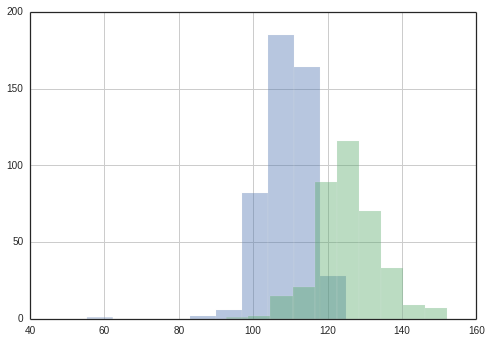

In [106]:
# Gender diference - Strength
data.groupby('Gender').Strength_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: Dexterity_Unadj, dtype: object

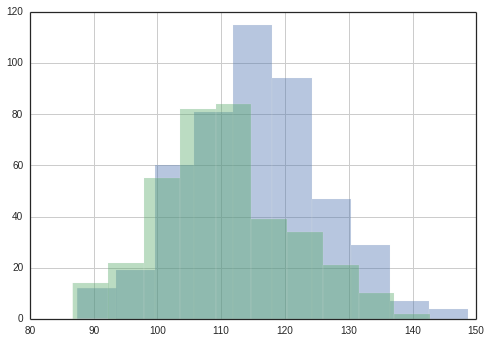

In [107]:
# Gender diference - Dexterity
data.groupby('Gender').Dexterity_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: PainInterf_Tscore, dtype: object

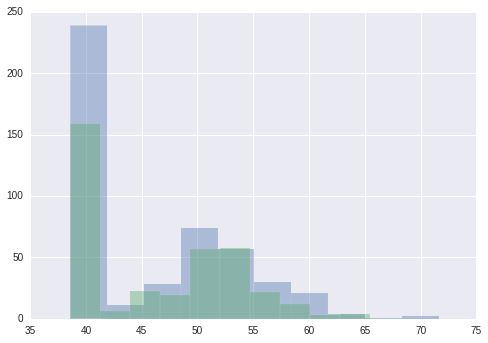

In [118]:
# Gender diference - PainInterf_Tscore
data.groupby('Gender').PainInterf_Tscore.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: Odor_Unadj, dtype: object

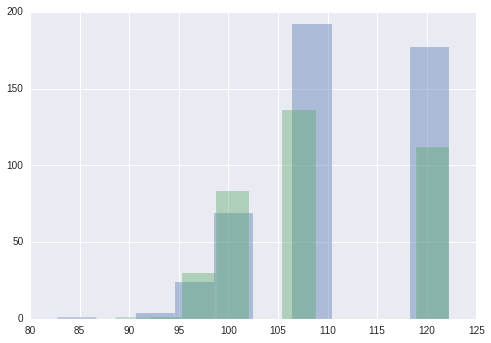

In [119]:
# Gender diference - Odor_Unadj
data.groupby('Gender').Odor_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: GaitSpeed_Comp, dtype: object

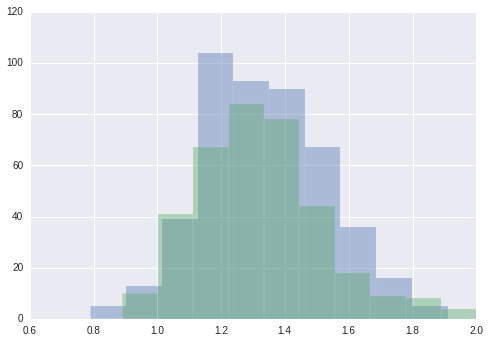

In [120]:
# Gender diference - GaitSpeed_Comp
data.groupby('Gender').GaitSpeed_Comp.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: Endurance_Unadj, dtype: object

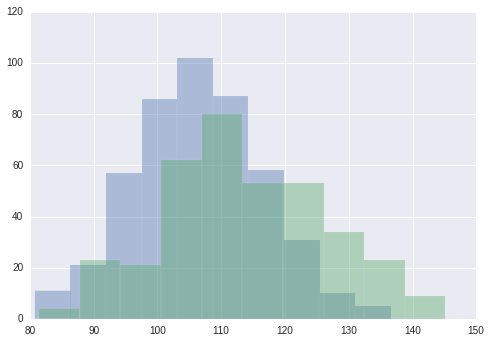

In [121]:
# Gender diference - Endurance_Unadj
data.groupby('Gender').Endurance_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: BMI, dtype: object

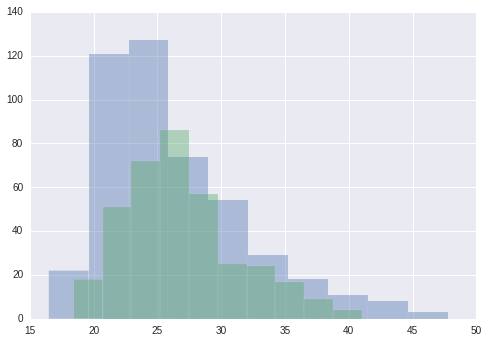

In [122]:
# Gender diference - BMI
data.groupby('Gender').BMI.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: FD, dtype: object

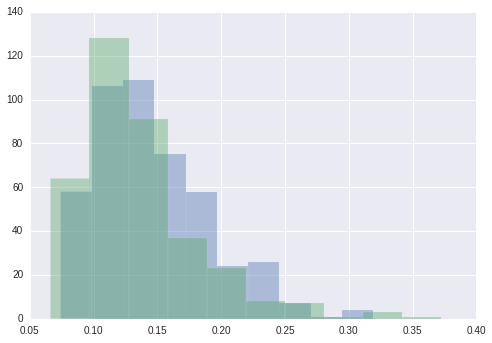

In [123]:
# Gender diference - FD
data.groupby('Gender').FD.hist(alpha=0.4)